# Get acoustic measures from production task

Input txt files from Voicesauce and clean.
* All cleaned TextGrids should be saved in textgrids folder
* output.txt file should contain output from voicesauce run over all wav files and cleaned Textgrids with tier number 3, and number of subsegments set to 1

In [1]:
import pandas as pd
import os
from audiolabel import read_label
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import factor_analyzer as fa # factor analysis algorithm

In [2]:
df_4 = pd.read_csv("voicesauce_txt/output_LPC4.txt", sep = "\t")
df_4.head()

,Filename,Label,seg_Start,seg_End,H1c_mean,H2c_mean,H4c_mean,A1c_mean,A2c_mean,A3c_mean,...,shrF0_mean,sF1_mean,sF2_mean,sF3_mean,sF4_mean,pF1_mean,pF2_mean,pF3_mean,pF4_mean,Unnamed: 45
0,afs116_catala_exp2_a.mat,i,5808.263,5880.0,0.000,0.000,0.000,0.000,0.000,0.000,...,215.573,370.632,1022.064,2757.576,3710.802,841.155,2768.201,4036.461,4219.764,NaN
1,afs116_catala_exp2_a.mat,a,5974.435,6249.1,10.511,2.333,10.185,-12.022,5.514,2.974,...,250.642,599.884,1252.682,1647.339,3698.479,1041.290,1572.536,3588.091,4465.044,NaN
2,afs116_catala_exp2_a.mat,i,11426.143,11540.6,12.054,11.128,11.402,-9.519,1.819,26.349,...,208.054,329.584,1041.040,3249.417,4219.348,946.664,3353.907,4362.954,0.000,NaN
3,afs116_catala_exp2_a.mat,a,11790.600,12090.6,10.516,2.929,6.733,-13.412,2.009,3.168,...,260.936,626.387,1297.339,2301.141,3933.510,966.891,1574.426,3477.352,4437.865,NaN
4,afs116_catala_exp2_a.mat,i,41302.182,41500.2,12.355,7.137,11.799,-3.304,-0.731,22.468,...,216.376,369.904,1050.428,3358.187,4359.227,940.577,3371.857,4444.714,4604.958,NaN


In [3]:
df_5 = pd.read_csv("voicesauce_txt/output_LPC5.txt", sep = "\t")
df_6 = pd.read_csv("voicesauce_txt/output_LPC6.txt", sep = "\t")
df_5_fixed = pd.read_csv("voicesauce_txt/output_mistakes5.txt", sep = "\t")
df_5_odd = pd.read_csv("voicesauce_txt/output_mistakes_odd_5.txt", sep = "\t")
df_6_odd = pd.read_csv("voicesauce_txt/output_mistakes_odd_6.txt", sep = "\t")

In [4]:
print(len(df_5))
df_5 = df_5[(df_5['Filename']!='ala054_catala_exp2_d.mat') &
           (df_5['Filename']!='ala054_spanish_exp2_a.mat') &
           (df_5['Filename']!='aps124_spanish_exp2_b.mat')].copy()
df_5.reset_index(inplace = True, drop = True)
len(df_5)

19209


19116

In [5]:
print(len(df_6))
df_6 = df_6[df_6['Filename']!='dis022_english_exp2_e.mat'].copy()
df_6.reset_index(inplace = True, drop = True)
len(df_6)

7341


7288

In [6]:
df_all = pd.concat([df_4, df_5, df_6, df_5_fixed, df_5_odd, df_6_odd], ignore_index = True)
df_all.head()

,Filename,Label,seg_Start,seg_End,H1c_mean,H2c_mean,H4c_mean,A1c_mean,A2c_mean,A3c_mean,...,Unnamed: 45,sB1_mean,sB2_mean,sB3_mean,sB4_mean,pB1_mean,pB2_mean,pB3_mean,pB4_mean,Unnamed: 53
0,afs116_catala_exp2_a.mat,i,5808.263,5880.0,0.000,0.000,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,afs116_catala_exp2_a.mat,a,5974.435,6249.1,10.511,2.333,10.185,-12.022,5.514,2.974,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,afs116_catala_exp2_a.mat,i,11426.143,11540.6,12.054,11.128,11.402,-9.519,1.819,26.349,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,afs116_catala_exp2_a.mat,a,11790.600,12090.6,10.516,2.929,6.733,-13.412,2.009,3.168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,afs116_catala_exp2_a.mat,i,41302.182,41500.2,12.355,7.137,11.799,-3.304,-0.731,22.468,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Add partID and language columns.

In [7]:
df_all['partID'] = df_all['Filename'].str[:6]
df_all['Language'] = df_all['Filename'].str[7:10]

Convert times from ms to s to align with TextGrid dfs.

In [8]:
df_all['seg_Start'] = df_all['seg_Start']/1000
df_all['seg_End'] = df_all['seg_End']/1000

Count number of participants and languages. There should be 49 for Catalan (one was dropped due to poor audio quality), 50 for Spanish, and 70 for English.

In [9]:
df_all.groupby(['Language']).partID.nunique()

Language
_en     1
cat    49
eng    69
spa    50
Name: partID, dtype: int64

Change `_eng` to `eng` (one participant ID was an extra digit).

In [10]:
df_all['Language'].mask(df_all['Language'] == '_en', 'eng', inplace=True)
df_all.groupby(['Language']).partID.nunique()

Language
cat    49
eng    70
spa    50
Name: partID, dtype: int64

In [11]:
df_all['partID'].mask(df_all['partID'] == 'rsj048', 'rsj0489', inplace=True)

In [12]:
# check for files missing a vowel in one of the words
chunk = df_all.groupby(['Filename'])['Label'].count()
chunk[chunk.values%2==1]

Series([], Name: Label, dtype: int64)

Remove unnecessary columns.

In [13]:
df_all.columns

Index(['Filename', 'Label', 'seg_Start', 'seg_End', 'H1c_mean', 'H2c_mean',
       'H4c_mean', 'A1c_mean', 'A2c_mean', 'A3c_mean', 'H1H2c_mean',
       'H2H4c_mean', 'H1A1c_mean', 'H1A2c_mean', 'H1A3c_mean', 'CPP_mean',
       'Energy_mean', 'HNR05_mean', 'HNR15_mean', 'HNR25_mean', 'HNR35_mean',
       'SHR_mean', 'H1u_mean', 'H2u_mean', 'H4u_mean', 'A1u_mean', 'A2u_mean',
       'A3u_mean', 'H1H2u_mean', 'H2H4u_mean', 'H1A1u_mean', 'H1A2u_mean',
       'H1A3u_mean', 'strF0_mean', 'sF0_mean', 'pF0_mean', 'shrF0_mean',
       'sF1_mean', 'sF2_mean', 'sF3_mean', 'sF4_mean', 'pF1_mean', 'pF2_mean',
       'pF3_mean', 'pF4_mean', 'Unnamed: 45', 'sB1_mean', 'sB2_mean',
       'sB3_mean', 'sB4_mean', 'pB1_mean', 'pB2_mean', 'pB3_mean', 'pB4_mean',
       'Unnamed: 53', 'partID', 'Language'],
      dtype='object')

In [14]:
df_all.drop(['H1u_mean', 'H2u_mean', 'H4u_mean', 'A1u_mean', 'A2u_mean', 'A3u_mean', 'H1H2u_mean',
        'H2H4u_mean', 'H1A1u_mean', 'H1A2u_mean', 'H1A3u_mean', 'Unnamed: 45', 'sB1_mean',
        'sB2_mean', 'sB3_mean', 'sB4_mean', 'pB1_mean', 'pB2_mean', 'pB3_mean', 'pB4_mean',
        'Unnamed: 53'], axis = 1, inplace = True)

## Read in TextGrids for additional information

In [15]:
# create function that will take in textgrid and output df
def tg2df(filepath, wd_tier, ph_tier, vowel_tier, stress_tier, syllable_tier):
    
    if syllable_tier != 0:
        [wddf, phdf, vdf, sdf, sydf] = read_label(filepath,
            ftype='praat',
            tiers=[wd_tier, ph_tier, vowel_tier, stress_tier, syllable_tier]
        )
    else:
        [wddf, phdf, vdf, sdf] = read_label(filepath,
            ftype='praat',
            tiers=[wd_tier, ph_tier, vowel_tier, stress_tier]
        )
        
    newdf = pd.merge_asof(phdf.rename({'t1': 't1_ph', 't2': 't2_ph', 'label': "phone"},
                                        axis ='columns'),
                    wddf.drop(["fname"], axis = 1) \
                    .rename({'t1': 't1_wd', 't2': 't2_wd', "label": "word"}, axis='columns'),
                    left_on='t1_ph',
                    right_on='t1_wd')
        
    # make fname match output of voicesauce
    newdf['fname'] = newdf['fname'].str[10:-8] + 'mat'
    
    if syllable_tier != 0:
        # get duration of final s in converts
        newdf['s_dur'] = np.where((newdf['word']=='converts') & (newdf['phone']=='S'),
                         newdf['t2_ph']-newdf['t1_ph'],
                        0)
        s_durs = newdf.groupby(['t1_wd'])[['s_dur']].max()
        newdf = pd.merge(newdf, s_durs, on = 't1_wd', suffixes = ('_s', '_word'))
        newdf.drop(['s_dur_s'], axis = 1, inplace = True)
     
    # prep vowel df
    vdf = vdf[vdf['vowels']!=''].copy()
    vdf.drop(['fname', 't2'], axis = 1, inplace = True)
    vdf = vdf.rename({'t1': 't1_ph'}, axis = 'columns')
    vdf.reset_index(drop = True, inplace = True)
    
    if syllable_tier != 0:
        # prep syllable df, join to vdf
        sydf.drop(['fname'], axis = 1, inplace = True)
        sydf = sydf.rename({'t1': 't1_syl', 't2': 't2_syl'}, axis = 'columns')
        sydf = sydf[sydf['syllable']!=''].copy()
        sydf.reset_index(inplace = True, drop = True)
        sydf.drop(['syllable'], axis = 1, inplace= True)
        vdf = vdf.join(sydf)
    
        # add stress info, merge to vdf
        sdf.drop(['fname', 't2'], axis = 1, inplace = True)
        sdf = sdf.rename({'t1': 't1_ph'}, axis = 1)
        sdf = sdf[sdf['stress']!=''].copy()
        sdf.reset_index(inplace = True, drop = True)
        vdf = pd.merge(vdf, sdf, on='t1_ph')
        
        # merge to newdf
        newdf = pd.merge(newdf, vdf, on = "t1_ph")
        
        # repair syllable duration for converts, then drop extra column
        newdf['t2_wd'] = newdf['t2_wd']-newdf['s_dur_word']
        newdf['t2_syl'] = newdf['t2_syl']-newdf['s_dur_word']
        newdf.drop(['s_dur_word'], axis = 1, inplace = True)

    else:
        # merge to newdf, add syllable info
        newdf = pd.merge(newdf, vdf, on = "t1_ph", how = "outer")
        newdf['t1_syl'] = newdf['t1_ph'].shift(1).fillna(0)
        newdf['t2_syl'] = newdf['t2_ph']
        
        # drop rows without vowels
        newdf = newdf[newdf['vowels'].notna()].copy()
        
        # prep stress info, merge to newdf
        sdf.drop(['fname', 't2'], axis = 1, inplace = True)
        sdf = sdf.rename({'t1': 't1_ph'}, axis = 1)
        newdf = pd.merge(newdf, sdf, on="t1_ph")
    
    # add syllable duration and vowel duration
    newdf['syl_dur'] = newdf['t2_syl']-newdf['t1_syl']
    newdf['v_dur'] = newdf['t2_ph']-newdf['t1_ph']
    
    # drop t2_ph col
    newdf.drop(['t2_ph'], axis = 1, inplace = True)
    
    return(newdf)

In [16]:
# loop through textgrid folder and create master df
tg_folder = "textgrids/"
corpora = os.listdir(tg_folder)
df_list = []

for f in corpora:
    if f.endswith(".TextGrid"):
        filepath = tg_folder + f
    
        if "english" in f:
            wd_tier = "sentence - words"
            ph_tier = "sentence - phones"
            vowel_tier = "vowels"
            stress_tier = "stress"
            syllable_tier = "syllable"
        else:
            wd_tier = "sentence - words"
            ph_tier = "sentence - phones"
            vowel_tier = "vowels"
            stress_tier = "stress"
            syllable_tier = 0
    
        new_df = tg2df(filepath, wd_tier, ph_tier, vowel_tier, stress_tier, syllable_tier)
        df_list.append(new_df)

tg_data = pd.concat(df_list)
tg_data.sample(10)

,t1_ph,phone,fname,t1_wd,t2_wd,word,vowels,t1_syl,t2_syl,stress,syl_dur,v_dur
9,27.174600,EH1,ruj030_english_exp2_f.mat,26.874600,27.364600,subject,ult,22.604600,22.884600,1,0.280000,0.080000
30,92.798847,i,acj297_spanish_exp2_b.mat,92.480000,92.980000,encamino,i,92.730000,92.860011,1,0.130011,0.061164
31,101.488817,o,ala054_spanish_exp2_a.mat,100.873800,101.563800,extermino,o,101.447559,101.563800,0,0.116241,0.074983
23,86.019095,AO1,era049_english_exp2_b.mat,85.781057,86.253100,import,ult,85.923100,86.253100,1,0.330000,0.080822
37,96.363300,a,eir057_catala_exp2_d.mat,95.947802,96.454060,determinar,a,96.330037,96.454060,1,0.124022,0.090760
35,86.169900,ER0,acr108_english_exp2_c.mat,85.959900,86.309900,desert,ult,86.099900,86.309900,0,0.210000,0.080000
2,8.107225,AA1,eir057_english_exp2_b.mat,8.022504,8.408070,converts,pen,8.022504,8.191947,1,0.169444,0.108503
0,23.925452,i,lic063_catala_exp2_d.mat,23.473942,24.330225,encaminar,i,23.852258,23.992100,1,0.139842,0.066648
2,16.895381,AA1,ala054_english_exp2_a.mat,16.753600,17.623600,compact,pen,16.753600,17.173600,1,0.420000,0.075928
30,87.837723,i,enp048_spanish_exp2_b.mat,87.631031,88.001699,iluminó,i,87.782605,87.885800,0,0.103195,0.048077


## Merge dataframes together

In [17]:
N = 1000000
df_all.seg_Start = np.round(df_all.seg_Start*N).astype(int) 
tg_data.t1_ph = np.round(tg_data.t1_ph*N).astype(int)

In [285]:
df = pd.merge(df_all, tg_data, left_on = ['Filename', 'Label', 'seg_Start'],
             right_on = ['fname', 'vowels', 't1_ph'], how = "left")
df.seg_Start = df.seg_Start / N
print(len(df))
df.sample(10)

27976


,Filename,Label,seg_Start,seg_End,H1c_mean,H2c_mean,H4c_mean,A1c_mean,A2c_mean,A3c_mean,...,fname,t1_wd,t2_wd,word,vowels,t1_syl,t2_syl,stress,syl_dur,v_dur
7846,arc053_spanish_exp2_a.mat,i,7.421015,7.480900,0.000,0.000,0.000,0.000,0.000,0.000,...,arc053_spanish_exp2_a.mat,7.163668,7.580900,abomino,i,7.339479,7.480900,1,0.141421,0.059885
12145,irm067_catala_exp2_d.mat,a,52.562844,52.652500,7.892,3.516,2.265,-10.199,-7.879,-5.280,...,irm067_catala_exp2_d.mat,51.992500,52.652500,recrimina,a,52.492500,52.652500,0,0.160000,0.089656
23589,hya248_catala_exp2_a.mat,a,64.490100,64.650645,20.086,14.594,5.844,-7.961,-0.552,5.810,...,hya248_catala_exp2_a.mat,63.940100,64.650645,determinar,a,64.415612,64.650645,1,0.235033,0.160545
22251,eir057_catala_exp2_e.mat,a,36.850400,36.911115,30.735,31.758,15.921,9.126,10.740,10.802,...,eir057_catala_exp2_e.mat,36.381758,36.911115,discrimina,a,36.836155,36.911115,0,0.074960,0.060715
7810,arc053_english_exp2_f.mat,pen,12.658300,12.698300,0.000,0.000,0.000,0.000,0.000,0.000,...,arc053_english_exp2_f.mat,12.618300,12.888300,record,pen,12.618300,12.698300,0,0.080000,0.040000
15865,mae116_english_exp2_h.mat,ult,48.128098,48.270170,3.068,7.808,-1.779,-15.905,-2.534,3.058,...,mae116_english_exp2_h.mat,47.847534,48.429977,contract,ult,47.987501,48.429977,1,0.442476,0.142072
1418,acj047_english_exp2_c.mat,pen,95.229584,95.273400,0.000,0.000,0.000,0.000,0.000,0.000,...,acj047_english_exp2_c.mat,95.169300,95.675413,contract,pen,95.169300,95.352178,0,0.182878,0.043815
643,ala059_english_exp2_e.mat,ult,12.548878,12.627800,12.659,-0.636,3.810,-8.529,-5.274,-1.667,...,ala059_english_exp2_e.mat,12.367263,12.667800,desert,ult,12.457800,12.667800,0,0.210000,0.078922
25609,nie059_catala_exp2_d.mat,a,26.146400,26.266400,18.595,6.463,3.819,-12.925,-19.079,-0.596,...,nie059_catala_exp2_d.mat,25.736400,26.266400,eliminar,a,26.076400,26.266400,1,0.190000,0.120000
14638,lnd078_english_exp2_c.mat,pen,19.897482,19.964100,0.000,0.000,0.000,0.000,0.000,0.000,...,lnd078_english_exp2_c.mat,19.897482,20.324100,import,pen,19.897482,20.024100,0,0.126618,0.066618


In [286]:
# check for misaligned intervals in TextGrids
chunk = df.groupby(['Filename', 'word'])['Label'].count()
chunk[chunk.values%2==1]

Series([], Name: Label, dtype: int64)

In [287]:
df.Label.unique()

array(['i', 'a', 'pen', 'ult', 'ultimate', '1', '0', 'penn', 'o', 'penu',
       'ut', 'ulr'], dtype=object)

In [288]:
print(len(df))
df[(df['Label']=='a')&(df['Language']=="eng")]

27976


,Filename,Label,seg_Start,seg_End,H1c_mean,H2c_mean,H4c_mean,A1c_mean,A2c_mean,A3c_mean,...,fname,t1_wd,t2_wd,word,vowels,t1_syl,t2_syl,stress,syl_dur,v_dur
14045,lld029_english_exp2_c.mat,a,42.7853,42.8953,9.882,9.6,0.002,-15.519,-8.307,-2.33,...,lld029_english_exp2_c.mat,42.4953,43.01946,compact,a,42.685106,43.01946,1,0.334354,0.11


In [289]:
df['Label'].mask(df['Label'] == 'ultimate', 'ult', inplace=True)
df['Label'].mask(df['Label'] == 'penn', 'pen', inplace=True)
df['Label'].mask(df['Label'] == 'penu', 'pen', inplace=True)
df['Label'].mask(df['Label'] == 'ut', 'ult', inplace=True)
df['Label'].mask(df['Label'] == 'ulr', 'ult', inplace=True)
df['Label'].mask(df['Label'] == '1', 'pen', inplace=True)
df['Label'].mask(df['Label'] == '0', 'ult', inplace=True)
df['Label'].mask((df['Label']=="pen")&(df['Language']=="spa"), 'i', inplace=True)
df['Label'].mask((df['Label']=="ult")&(df['Language']=="spa"), 'o', inplace=True)
df['Label'].mask((df['Label']=='a')&(df['Language']=="eng"), 'ult', inplace=True)

In [290]:
df.stress.unique()

array(['0', '1', 'pen', 'ult', 'o', '4', '0w'], dtype=object)

In [291]:
df[df['stress']=="4"]

,Filename,Label,seg_Start,seg_End,H1c_mean,H2c_mean,H4c_mean,A1c_mean,A2c_mean,A3c_mean,...,fname,t1_wd,t2_wd,word,vowels,t1_syl,t2_syl,stress,syl_dur,v_dur
21915,dis022_english_exp2_c.mat,ult,89.139311,89.179982,0.0,0.0,0.0,0.0,0.0,0.0,...,dis022_english_exp2_c.mat,88.8668,89.2468,convict,ult,83.9618,84.1418,4,0.18,0.040671


In [292]:
df['stress'].mask(df['stress'] == 'pen', '1', inplace=True)
df['stress'].mask(df['stress'] == 'ult', '0', inplace=True)
df['stress'].mask(df['stress'] == 'o', '0', inplace=True)
df['stress'].mask(df['stress'] == '4', '0', inplace=True)
df['stress'].mask(df['stress'] == '0w', '0', inplace=True)

In [293]:
df.isnull().sum()

Filename       0
Label          0
seg_Start      0
seg_End        0
H1c_mean       0
H2c_mean       0
H4c_mean       0
A1c_mean       0
A2c_mean       0
A3c_mean       0
H1H2c_mean     0
H2H4c_mean     0
H1A1c_mean     0
H1A2c_mean     0
H1A3c_mean     0
CPP_mean       0
Energy_mean    0
HNR05_mean     0
HNR15_mean     0
HNR25_mean     0
HNR35_mean     0
SHR_mean       0
strF0_mean     0
sF0_mean       0
pF0_mean       0
shrF0_mean     0
sF1_mean       0
sF2_mean       0
sF3_mean       0
sF4_mean       0
pF1_mean       0
pF2_mean       0
pF3_mean       0
pF4_mean       0
partID         0
Language       0
t1_ph          0
phone          0
fname          0
t1_wd          0
t2_wd          0
word           0
vowels         0
t1_syl         0
t2_syl         0
stress         0
syl_dur        0
v_dur          0
dtype: int64

In [294]:
df.columns

Index(['Filename', 'Label', 'seg_Start', 'seg_End', 'H1c_mean', 'H2c_mean',
       'H4c_mean', 'A1c_mean', 'A2c_mean', 'A3c_mean', 'H1H2c_mean',
       'H2H4c_mean', 'H1A1c_mean', 'H1A2c_mean', 'H1A3c_mean', 'CPP_mean',
       'Energy_mean', 'HNR05_mean', 'HNR15_mean', 'HNR25_mean', 'HNR35_mean',
       'SHR_mean', 'strF0_mean', 'sF0_mean', 'pF0_mean', 'shrF0_mean',
       'sF1_mean', 'sF2_mean', 'sF3_mean', 'sF4_mean', 'pF1_mean', 'pF2_mean',
       'pF3_mean', 'pF4_mean', 'partID', 'Language', 't1_ph', 'phone', 'fname',
       't1_wd', 't2_wd', 'word', 'vowels', 't1_syl', 't2_syl', 'stress',
       'syl_dur', 'v_dur'],
      dtype='object')

In [295]:
df.drop(['fname', 't1_ph', 'vowels'], axis = 1, inplace = True)

## Delta F vowel normalization

In [296]:
def delta_f(vowels, x): # df, prefix of formants
    
    Participant = []
    ll = []
    
    for i in vowels.partID.unique():
        data = vowels[vowels['partID']==i]
        
        delta = np.mean([np.true_divide(data[x + 'F1_mean'], 0.5), 
                        np.true_divide(data[x + 'F2_mean'], 1.5), 
                        np.true_divide(data[x + 'F3_mean'], 2.5)
                       ])
        
        Participant.append(i)
        ll.append(delta)
    
    deltas = {k:v for k,v in zip(Participant, ll)}
    delta_df = pd.DataFrame.from_dict(deltas, orient = "index", columns = [x + '_Delta_F'])
    delta_df = delta_df.rename_axis('partID').reset_index()
        
    return(delta_df)

In [297]:
def normalization(vowels):
    delta_df_snack = delta_f(df, "s")
    delta_df_praat = delta_f(df, "p")
    
    deltas = delta_df_snack.set_index("partID").join(delta_df_praat.set_index("partID"))
    deltas = deltas.reset_index()
    
    vowels_normalized = pd.merge(left = df,
                                 right = deltas,
                                 on = 'partID',
                                 how = 'outer')
    vowels_normalized['sF1_norm'] = vowels_normalized['sF1_mean']/vowels_normalized['s_Delta_F']
    vowels_normalized['sF2_norm'] = vowels_normalized['sF2_mean']/vowels_normalized['s_Delta_F']
    
    vowels_normalized['pF1_norm'] = vowels_normalized['pF1_mean']/vowels_normalized['p_Delta_F']
    vowels_normalized['pF2_norm'] = vowels_normalized['pF2_mean']/vowels_normalized['p_Delta_F']
    
    
    return(vowels_normalized)

In [298]:
df = normalization(df)
df.sample(2)

,Filename,Label,seg_Start,seg_End,H1c_mean,H2c_mean,H4c_mean,A1c_mean,A2c_mean,A3c_mean,...,t2_syl,stress,syl_dur,v_dur,s_Delta_F,p_Delta_F,sF1_norm,sF2_norm,pF1_norm,pF2_norm
21536,arr030_english_exp2_a.mat,pen,73.7015,73.781500,17.819,11.159,8.894,-2.618,3.639,13.620,...,73.861500,1,0.311913,0.080000,1080.247188,1087.567517,0.555373,1.360194,0.622354,1.367122
23867,hya248_catala_exp2_c.mat,a,12.0085,12.197134,13.341,9.323,7.024,-3.156,-0.703,5.367,...,12.197134,0,0.288634,0.188634,927.640298,922.173073,0.353121,1.399079,0.590311,1.422796


In [299]:
df.drop(['s_Delta_F', 'p_Delta_F', 'phone', 'seg_Start',
         't1_syl', 't2_syl', 'seg_End', 'sF1_mean', 'sF2_mean',
        'sF3_mean', 'sF4_mean', 'pF1_mean', 'pF2_mean', 'pF3_mean',
        'pF4_mean', 'H1c_mean', 'H2c_mean', 'H4c_mean',
        'A1c_mean', 'A2c_mean', 'A3c_mean'], axis = 1, inplace = True)

In [300]:
df['sF1_norm_center'] = df['sF1_norm']-0.5
df['pF1_norm_center'] = df['pF1_norm']-0.5
df['sF2_norm_center'] = df['sF2_norm']-1.5
df['pF2_norm_center'] = df['pF2_norm']-1.5
df['s_deltaF_dist'] = np.sqrt(np.square(df['sF1_norm_center']) + 
                                           np.square(df['sF2_norm_center']))
df['p_deltaF_dist'] = np.sqrt(np.square(df['pF1_norm_center']) + 
                                           np.square(df['pF2_norm_center']))

In [301]:
check_df = pd.DataFrame(df.groupby(['partID', 'Language', 'Label', 'stress'])['sF1_norm_center', 'sF2_norm_center',
                                                                             's_deltaF_dist', 'p_deltaF_dist'].mean())
check_df.head()

<ipython-input-301-caf926aea618>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  check_df = pd.DataFrame(df.groupby(['partID', 'Language', 'Label', 'stress'])['sF1_norm_center', 'sF2_norm_center',


sF1_norm_center  sF2_norm_center  s_deltaF_dist  \
partID Language Label stress                                                    
acj047 eng      pen   0             -0.132305         0.095661       0.330697   
                      1              0.023989         0.056534       0.382204   
                ult   0             -0.048871         0.234953       0.404417   
                      1              0.034200         0.215323       0.415284   
acj297 cat      a     0              0.147586        -0.001992       0.174184   

                              p_deltaF_dist  
partID Language Label stress                 
acj047 eng      pen   0            0.273044  
                      1            0.300457  
                ult   0            0.337735  
                      1            0.353312  
acj297 cat      a     0            0.140784

In [302]:
check_df.reset_index(inplace = True)
check_df.head()

,partID,Language,Label,stress,sF1_norm_center,sF2_norm_center,s_deltaF_dist,p_deltaF_dist
0,acj047,eng,pen,0,-0.132305,0.095661,0.330697,0.273044
1,acj047,eng,pen,1,0.023989,0.056534,0.382204,0.300457
2,acj047,eng,ult,0,-0.048871,0.234953,0.404417,0.337735
3,acj047,eng,ult,1,0.034200,0.215323,0.415284,0.353312
4,acj297,cat,a,0,0.147586,-0.001992,0.174184,0.140784


<AxesSubplot: xlabel='Label', ylabel='sF1_norm_center'>

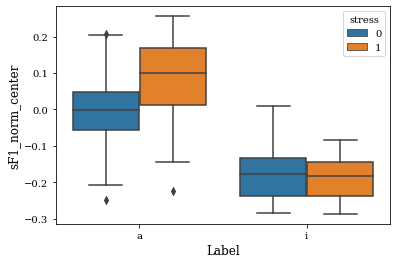

In [303]:
plot_cat = check_df[check_df['Language']=="cat"].copy()
sns.boxplot(data=plot_cat, x="Label", y="sF1_norm_center", hue="stress")

<AxesSubplot: xlabel='Label', ylabel='sF2_norm_center'>

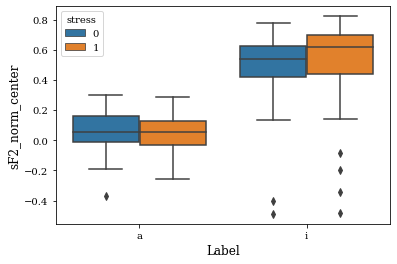

In [304]:
sns.boxplot(data=plot_cat, x="Label", y="sF2_norm_center", hue="stress")

<AxesSubplot: xlabel='Label', ylabel='s_deltaF_dist'>

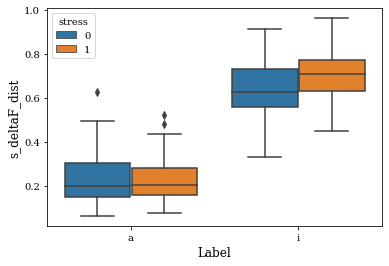

In [305]:
sns.boxplot(data=plot_cat, x="Label", y="s_deltaF_dist", hue="stress")

<AxesSubplot: xlabel='Label', ylabel='p_deltaF_dist'>

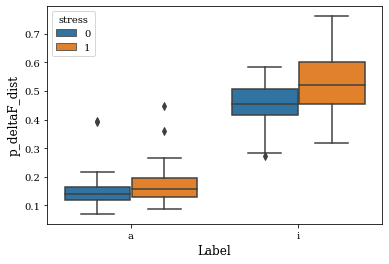

In [306]:
sns.boxplot(data=plot_cat, x="Label", y="p_deltaF_dist", hue="stress")

<AxesSubplot: xlabel='Label', ylabel='sF1_norm_center'>

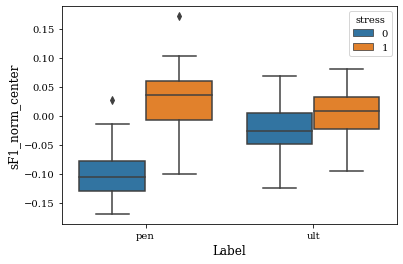

In [307]:
plot_eng = check_df[check_df['Language']=="eng"].copy()
sns.boxplot(data=plot_eng, x="Label", y="sF1_norm_center", hue="stress")

<AxesSubplot: xlabel='Label', ylabel='sF2_norm_center'>

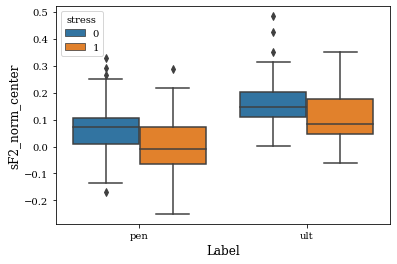

In [308]:
sns.boxplot(data=plot_eng, x="Label", y="sF2_norm_center", hue="stress")

<AxesSubplot: xlabel='Label', ylabel='sF1_norm_center'>

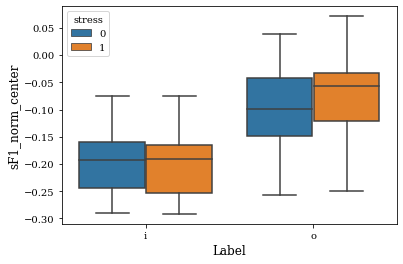

In [309]:
plot_spa = check_df[check_df['Language']=="spa"].copy()
sns.boxplot(data=plot_spa, x="Label", y="sF1_norm_center", hue="stress")

<AxesSubplot: xlabel='Label', ylabel='sF2_norm_center'>

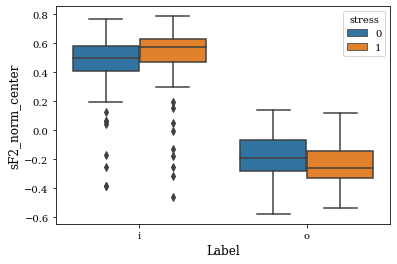

In [310]:
sns.boxplot(data=plot_spa, x="Label", y="sF2_norm_center", hue="stress")

In [311]:
df.columns

Index(['Filename', 'Label', 'H1H2c_mean', 'H2H4c_mean', 'H1A1c_mean',
       'H1A2c_mean', 'H1A3c_mean', 'CPP_mean', 'Energy_mean', 'HNR05_mean',
       'HNR15_mean', 'HNR25_mean', 'HNR35_mean', 'SHR_mean', 'strF0_mean',
       'sF0_mean', 'pF0_mean', 'shrF0_mean', 'partID', 'Language', 't1_wd',
       't2_wd', 'word', 'stress', 'syl_dur', 'v_dur', 'sF1_norm', 'sF2_norm',
       'pF1_norm', 'pF2_norm', 'sF1_norm_center', 'pF1_norm_center',
       'sF2_norm_center', 'pF2_norm_center', 's_deltaF_dist', 'p_deltaF_dist'],
      dtype='object')

In [312]:
df.drop(['sF1_norm', 'pF1_norm', 'sF2_norm', 'pF2_norm'], axis = 1, inplace = True)

## PCA on remaining spectral measures

Isolate columns to use for PCA:

In [313]:
scale_subset = df.drop(['Filename', 'Label', 'Language', 't1_wd', 't2_wd',
                     'word', 'stress', 's_deltaF_dist', 'p_deltaF_dist', 'pF1_norm_center',
                       'pF2_norm_center', 'sF2_norm_center', 'sF1_norm_center'],
                    axis = 1)
scale_subset.columns

Index(['H1H2c_mean', 'H2H4c_mean', 'H1A1c_mean', 'H1A2c_mean', 'H1A3c_mean',
       'CPP_mean', 'Energy_mean', 'HNR05_mean', 'HNR15_mean', 'HNR25_mean',
       'HNR35_mean', 'SHR_mean', 'strF0_mean', 'sF0_mean', 'pF0_mean',
       'shrF0_mean', 'partID', 'syl_dur', 'v_dur'],
      dtype='object')

In [314]:
for_later = scale_subset.drop(['partID'], axis = 1)

In [315]:
cor_subset = df.drop(['Filename', 'Label', 'Language', 't1_wd', 't2_wd',
                     'word', 'stress', 's_deltaF_dist', 'p_deltaF_dist', 'pF1_norm_center',
                       'pF2_norm_center'],
                    axis = 1)
cor= cor_subset.corr(method='pearson')
print(cor)

                 H1H2c_mean  H2H4c_mean  H1A1c_mean  H1A2c_mean  H1A3c_mean  \
H1H2c_mean         1.000000   -0.042119    0.627145    0.584279    0.535623   
H2H4c_mean        -0.042119    1.000000    0.551434    0.560978    0.522805   
H1A1c_mean         0.627145    0.551434    1.000000    0.914130    0.807390   
H1A2c_mean         0.584279    0.560978    0.914130    1.000000    0.825272   
H1A3c_mean         0.535623    0.522805    0.807390    0.825272    1.000000   
CPP_mean           0.397133    0.350976    0.735130    0.690547    0.561366   
Energy_mean       -0.100024    0.059987   -0.052536   -0.036062   -0.021165   
HNR05_mean         0.442289    0.207561    0.644884    0.599488    0.452373   
HNR15_mean         0.441434    0.181067    0.611166    0.589402    0.466620   
HNR25_mean         0.451202    0.199537    0.638672    0.626736    0.480369   
HNR35_mean         0.451555    0.226912    0.666978    0.655612    0.515458   
SHR_mean          -0.129179    0.111305    0.016965 

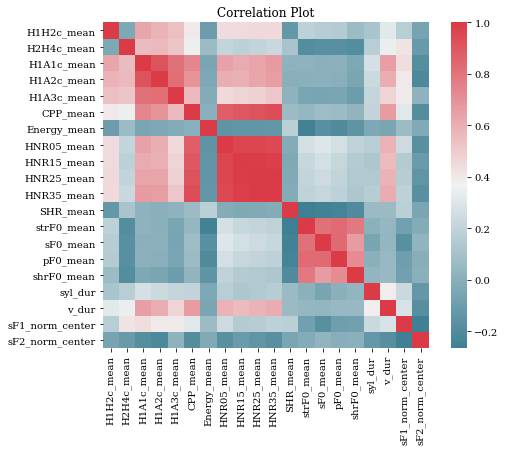

In [316]:
fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [257]:
columns_to_scale = list(scale_subset.columns)
columns_to_scale = [e for e in columns_to_scale if e not in ('partID')]
columns_to_scale

['H1H2c_mean',
 'H2H4c_mean',
 'H1A1c_mean',
 'H1A2c_mean',
 'H1A3c_mean',
 'CPP_mean',
 'Energy_mean',
 'HNR05_mean',
 'HNR15_mean',
 'HNR25_mean',
 'HNR35_mean',
 'SHR_mean',
 'strF0_mean',
 'sF0_mean',
 'pF0_mean',
 'shrF0_mean',
 'syl_dur',
 'v_dur']

In [258]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import  StandardScaler 
column_trans = ColumnTransformer(
    [('scaler', StandardScaler(),columns_to_scale)],
      remainder='passthrough')

In [259]:
scale_subset.head()

,H1H2c_mean,H2H4c_mean,H1A1c_mean,H1A2c_mean,H1A3c_mean,CPP_mean,Energy_mean,HNR05_mean,HNR15_mean,HNR25_mean,HNR35_mean,SHR_mean,strF0_mean,sF0_mean,pF0_mean,shrF0_mean,partID,syl_dur,v_dur
0,0.000,0.000,0.000,0.000,0.000,0.000,2.027,0.000,0.000,0.000,0.000,0.689,214.879,214.724,215.169,215.573,afs116,0.145897,0.071737
1,8.178,-7.852,22.533,4.996,7.536,22.885,9.773,38.283,27.609,28.908,31.274,0.069,256.735,255.060,249.018,250.642,afs116,0.369100,0.274665
2,0.926,-0.275,21.573,10.235,-14.295,23.386,1.525,38.794,41.579,47.213,46.690,0.000,209.019,208.756,209.094,208.054,afs116,0.220000,0.114457
3,7.587,-3.805,23.928,8.507,7.348,22.635,6.205,40.017,31.012,32.570,34.712,0.110,264.008,263.577,257.407,260.936,afs116,0.550000,0.300000
4,5.218,-4.662,15.659,13.086,-10.113,24.928,1.563,46.984,48.124,54.370,53.177,0.429,215.571,215.483,215.614,216.376,afs116,0.333645,0.198018


In [260]:
scaled_dfs = []
for p in scale_subset.partID.unique():
    test_df = scale_subset[scale_subset['partID']==p].copy()
    test_df.drop(['partID'], axis = 1, inplace = True)
    test_scaled = pd.DataFrame(column_trans.fit_transform(test_df), columns = list(scale_subset.columns).remove('partID'))
    scaled_dfs.append(test_scaled)

ready_for_pca = pd.concat(scaled_dfs)
ready_for_pca.to_numpy()

array([[-0.27234526, -0.16601499, -1.30995931, ..., -0.16923684,
        -0.40743675, -0.72461931],
       [ 1.37480321, -1.51724946,  1.14776577, ...,  0.76479309,
         0.23734508,  1.94004265],
       [-0.08583762, -0.21333917,  1.04305641, ..., -0.36949836,
        -0.19336978, -0.16366427],
       ...,
       [ 0.43236061, -0.71448037, -0.7795682 , ...,  1.20220079,
        -0.36040883, -0.06110433],
       [ 0.43236061, -0.71448037, -0.7795682 , ..., -1.34713722,
        -0.76781389, -0.90940004],
       [-2.00983111,  2.77284908,  1.64649541, ...,  0.15568592,
         0.31859959,  0.52325859]])

In [261]:
ready_for_pca = ready_for_pca.astype(float)

Check if dataset meets statistical assumptions appropriate for PCA -- Bartlett's Test should return a significant p-value (<0.05) and the KMO Test should return a value greater than 0.6

In [262]:
# Bartlett's Test, prints the chi square value and associated p-value
fa.calculate_bartlett_sphericity(ready_for_pca)

(622783.9479581958, 0.0)

In [263]:
fa.calculate_kmo(ready_for_pca)[1] # index of 1 returns the overall KMO value

C:\Users\atarv\Anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.8443698773103286

Project the data onto as many principal components needed to explain 90% of the variance.

In [264]:
from sklearn.decomposition import PCA
pca_spectilt = PCA(0.9)
principalComponents_spectilt = pca_spectilt.fit_transform(ready_for_pca)
print("number of components: ", principalComponents_spectilt.shape[1])

number of components:  8


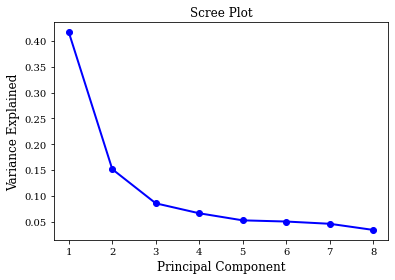

In [265]:
PC_values = np.arange(pca_spectilt.n_components_) + 1
tex_fonts = {
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 10,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10
}
plt.rcParams.update(tex_fonts)
plt.figure(figsize=(6,4))
plt.plot(PC_values, pca_spectilt.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.savefig('figures/scree_spectilt.jpg', format='jpg', dpi = 800)
plt.show()

Three components will be used, following the elbow method.

In [266]:
pca_spectilt = PCA(n_components = 3)
principalComponents_spectilt = pca_spectilt.fit_transform(ready_for_pca)

In [267]:
principal_spectilt_df = pd.DataFrame(data = principalComponents_spectilt,
                                columns = ['v_dur_period', 'low_f0', 'syl_dur_pca'])
print('Explained variation per principal component: {}'.format(pca_spectilt.explained_variance_ratio_))

Explained variation per principal component: [0.41700039 0.15159964 0.08547115]


In [268]:
# join with larger data set
df_pca = principal_spectilt_df.join(df)
df_pca.head()

,v_dur_period,low_f0,syl_dur_pca,Filename,Label,H1H2c_mean,H2H4c_mean,H1A1c_mean,H1A2c_mean,H1A3c_mean,...,word,stress,syl_dur,v_dur,sF1_norm_center,pF1_norm_center,sF2_norm_center,pF2_norm_center,s_deltaF_dist,p_deltaF_dist
0,-3.363244,-0.816675,0.688545,afs116_catala_exp2_a.mat,i,0.000,0.000,0.000,0.000,0.000,...,eliminar,0,0.145897,0.071737,-0.135341,0.100464,-0.494408,0.476100,0.512598,0.486584
1,2.301349,-3.083250,-0.059048,afs116_catala_exp2_a.mat,a,8.178,-7.852,22.533,4.996,7.536,...,eliminar,1,0.369100,0.274665,0.090216,0.243332,-0.267506,-0.377434,0.282309,0.449074
2,1.929232,-1.218171,-2.432617,afs116_catala_exp2_a.mat,i,0.926,-0.275,21.573,10.235,-14.295,...,discriminar,0,0.220000,0.114457,-0.175728,0.175783,-0.475738,0.894210,0.507155,0.911324
3,2.978800,-3.126351,0.295201,afs116_catala_exp2_a.mat,a,7.587,-3.805,23.928,8.507,7.348,...,discriminar,1,0.550000,0.300000,0.116292,0.190222,-0.223569,-0.376085,0.252006,0.421455
4,3.061862,-1.350370,-2.615549,afs116_catala_exp2_a.mat,i,5.218,-4.662,15.659,13.086,-10.113,...,encaminar,0,0.333645,0.198018,-0.136057,0.171437,-0.466501,0.907024,0.485937,0.923083


In [269]:
loadings = pca_spectilt.components_.T * np.sqrt(pca_spectilt.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=['v_duration_periodicity', 'low_f0', 'syl_duration'], index=for_later.columns)
loading_matrix

,v_duration_periodicity,low_f0,syl_duration
H1H2c_mean,0.532990,-0.121170,0.160942
H2H4c_mean,0.461672,0.274159,0.464435
H1A1c_mean,0.872672,0.118555,0.311724
H1A2c_mean,0.856893,0.103874,0.320674
H1A3c_mean,0.716774,0.162738,0.382239
CPP_mean,0.935989,0.048165,-0.227321
Energy_mean,0.079485,-0.183449,0.237429
HNR05_mean,0.917318,-0.063023,-0.300321
HNR15_mean,0.902007,-0.057590,-0.390868
HNR25_mean,0.920196,-0.046251,-0.361484


For ease of interpretation, multiply the second component by -1 so that it corresponds directly to pitch.

In [270]:
df_pca['f0'] = -1*df_pca['low_f0']

In [271]:
df_pca.columns

Index(['v_dur_period', 'low_f0', 'syl_dur_pca', 'Filename', 'Label',
       'H1H2c_mean', 'H2H4c_mean', 'H1A1c_mean', 'H1A2c_mean', 'H1A3c_mean',
       'CPP_mean', 'Energy_mean', 'HNR05_mean', 'HNR15_mean', 'HNR25_mean',
       'HNR35_mean', 'SHR_mean', 'strF0_mean', 'sF0_mean', 'pF0_mean',
       'shrF0_mean', 'partID', 'Language', 't1_wd', 't2_wd', 'word', 'stress',
       'syl_dur', 'v_dur', 'sF1_norm_center', 'pF1_norm_center',
       'sF2_norm_center', 'pF2_norm_center', 's_deltaF_dist', 'p_deltaF_dist',
       'f0'],
      dtype='object')

In [272]:
df_pca.drop(['H1H2c_mean', 'H2H4c_mean', 'H1A1c_mean', 'H1A2c_mean',
            'H1A3c_mean', 'CPP_mean', 'Energy_mean', 'HNR05_mean',
             'HNR15_mean', 'HNR25_mean', 'HNR35_mean', 'SHR_mean',
             'strF0_mean', 'sF0_mean', 'pF0_mean', 'shrF0_mean',
             'strF0_mean', 'syl_dur', 'v_dur', 's_deltaF_dist', 'p_deltaF_dist', 'low_f0',
            'pF1_norm_center', 'pF2_norm_center'],
            axis = 1, inplace = True)

In [273]:
df_pca = df_pca.rename(columns={'syl_dur_pca':'syl_dur'})

In [274]:
df_pca.to_csv("data/master_df_noblp.csv", index = False)

In [275]:
df_pca.groupby(['Language']).count()/2

,v_dur_period,syl_dur,Filename,Label,partID,t1_wd,t2_wd,word,stress,sF1_norm_center,sF2_norm_center,f0
Language,,,,,,,,,,,,
cat,3648.0,3648.0,3648.0,3648.0,3648.0,3648.0,3648.0,3648.0,3648.0,3648.0,3648.0,3648.0
eng,6879.0,6879.0,6879.0,6879.0,6879.0,6879.0,6879.0,6879.0,6879.0,6879.0,6879.0,6879.0
spa,3461.0,3461.0,3461.0,3461.0,3461.0,3461.0,3461.0,3461.0,3461.0,3461.0,3461.0,3461.0


In [276]:
len(df_pca)/2

13988.0

# Prepare for logreg in R

In [277]:
df = pd.read_csv("data/master_df_noblp.csv")

In [278]:
df['syllable'] = np.where((df['Label']=="i") | (df['Label']=="pen"), 'pen', 'ult')

In [279]:
parts = pd.read_csv("../blp/data/parts.csv")
parts['partID'] = parts['partID'].map(str.lower)

In [280]:
df_lang = pd.merge(df, parts, on = "partID", how = "left")
df_lang.head()

,v_dur_period,syl_dur,Filename,Label,partID,Language,t1_wd,t2_wd,word,stress,sF1_norm_center,sF2_norm_center,f0,syllable,lang_profile
0,-3.363244,0.688545,afs116_catala_exp2_a.mat,i,afs116,cat,5.502012,6.2491,eliminar,0,-0.135341,-0.494408,0.816675,pen,l1_eng
1,2.301349,-0.059048,afs116_catala_exp2_a.mat,a,afs116,cat,5.502012,6.2491,eliminar,1,0.090216,-0.267506,3.083250,ult,l1_eng
2,1.929232,-2.432617,afs116_catala_exp2_a.mat,i,afs116,cat,10.850600,12.0906,discriminar,0,-0.175728,-0.475738,1.218171,pen,l1_eng
3,2.978800,0.295201,afs116_catala_exp2_a.mat,a,afs116,cat,10.850600,12.0906,discriminar,1,0.116292,-0.223569,3.126351,ult,l1_eng
4,3.061862,-2.615549,afs116_catala_exp2_a.mat,i,afs116,cat,40.617489,42.1002,encaminar,0,-0.136057,-0.466501,1.350370,pen,l1_eng


In [281]:
blp_pca = pd.read_csv("../blp/data/pca_blp.csv")
blp_pca.drop(['lang_profile'], axis = 1, inplace = True)
df_blp = pd.merge(df_lang, blp_pca, on="partID", how = "left")

In [282]:
df_blp.drop(['Filename', 't1_wd', 't2_wd'], axis = 1, inplace = True)

In [283]:
df_blp.to_csv("data/master_df.csv", index = False)